In [18]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

print('done')

done


In [2]:
df_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
df_eng = pd.read_csv('takehome_user_engagement.csv')

In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Looking at the data types above, I noticed that creation_time and last_session_creation_time are either an object or float64 data type but they should be datetime[64]. We also do not need the name and email fields for this analysis.

In [4]:
df_users['creation_time'] = pd.to_datetime(df_users.creation_time)
df_users['last_session_creation_time'] = pd.to_datetime(df_users.last_session_creation_time)
df_users.drop(['name', 'email'], inplace=True, axis=1)
df_users.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


In [5]:
# I am creating dummies for the creation source column to use in the heatmap later in the analysis
df_users = pd.get_dummies(df_users, columns = ['creation_source'])
df_users

,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,1970-01-01 00:00:01.369210168,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,1970-01-01 00:00:01.358849660,0,0,193,5240.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,1970-01-01 00:00:01.378448055,0,0,89,8263.0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,1970-01-01 00:00:01.358274517,0,0,200,NaN,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,1970-01-01 00:00:01.398602716,1,1,83,8074.0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,1970-01-01 00:00:01.338638159,0,0,6,NaN,0,0,1,0,0


In [6]:
#Renaming object id to user id so I can merge the 2 tables later
df_users.rename(columns={'object_id': 'user_id'}, inplace=True)
df_users

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,1970-01-01 00:00:01.396237504,0,0,1,316.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,1970-01-01 00:00:01.369210168,0,0,1,5151.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,1970-01-01 00:00:01.358849660,0,0,193,5240.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,1970-01-01 00:00:01.378448055,0,0,89,8263.0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,1970-01-01 00:00:01.358274517,0,0,200,NaN,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,1970-01-01 00:00:01.398602716,1,1,83,8074.0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,1970-01-01 00:00:01.338638159,0,0,6,NaN,0,0,1,0,0


In [7]:
print(df_eng.info())
print(df_eng['visited'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None
1    207917
Name: visited, dtype: int64


The time_stamp column is an object type so I will change that to datetime[64] and since the only values for the visited column are 1, I will drop the field completely since it is not needed for our analysis

In [8]:
df_eng['time_stamp'] = pd.to_datetime(df_eng.time_stamp)
df_eng.drop(['visited'], inplace=True, axis=1)
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [9]:
def logins(df):
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    days_passed = df['date'].diff(periods=3-1)
    return any(days_passed <= timedelta(days=7))
df_eng['adopted'] = df_eng.groupby('user_id').apply(logins)
print('done')

done


In [10]:
df_eng['adopted'].sum()
print(df_eng['adopted'].sum() / df_eng['adopted'].count())

0.18769126147568854


18.77% of users are considered adopted.

In [11]:
# Making sure all NA and False values are in the dataframe as 0 and all the Trues are in the dataframe as 1 for the heatmap below
df_eng['adopted'].fillna(0, inplace=True)
df_eng['adopted'] = df_eng['adopted'].astype(int)

In [13]:
new_df = pd.merge(df_eng, df_users, on='user_id', how='left')
new_df['adopted'].value_counts()

0    206261
1      1656
Name: adopted, dtype: int64

In [14]:
new_df.dtypes

time_stamp                            datetime64[ns]
user_id                                        int64
adopted                                        int64
creation_time                         datetime64[ns]
last_session_creation_time            datetime64[ns]
opted_in_to_mailing_list                       int64
enabled_for_marketing_drip                     int64
org_id                                         int64
invited_by_user_id                           float64
creation_source_GUEST_INVITE                   uint8
creation_source_ORG_INVITE                     uint8
creation_source_PERSONAL_PROJECTS              uint8
creation_source_SIGNUP                         uint8
creation_source_SIGNUP_GOOGLE_AUTH             uint8
dtype: object

In [15]:
df_drop_dates = new_df.drop(['invited_by_user_id', 'time_stamp', 'last_session_creation_time', 'user_id','creation_time'], axis=1)

done


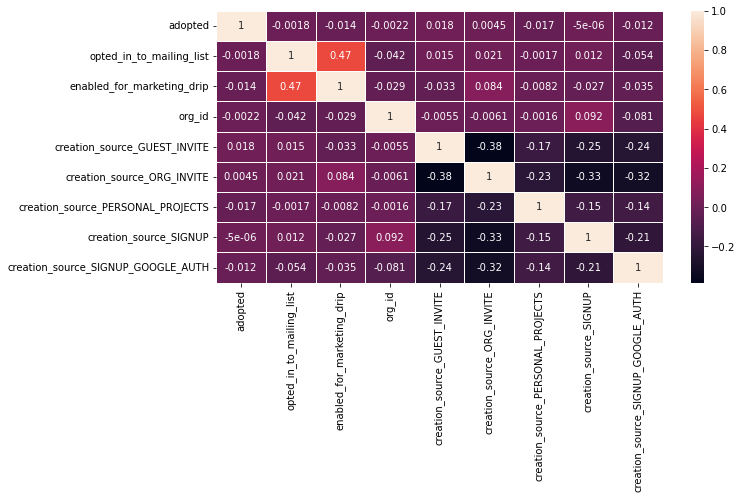

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_drop_dates.corr(), annot = True, ax=ax, linewidths=0.5)
print('done')

## Conclusion

There is no correlation between whether a user is adopted and the rest of the features. The strongest correlation is with 'guest invite' account creation source. If a guest invites the user to the platform, they are more likely to become an 'adopted' user but the correlation is so small that we can't consider this significant.